In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import numpy as np
import os

In [ ]:
# 사용자 정의 손실 함수 정의
def custom_loss(y_true, y_pred):
    # y_true와 y_pred의 마지막 차원(64, 64, 3)에서 모든 값이 일치하는지 확인
    tensor = tf.reduce_all(tf.equal(frame1, frame2), axis=-1)

    false_count = tf.reduce_sum(tf.cast(tf.logical_not(tensor), tf.int32))


    # 손실을 1 - loss로 반환 (일치하면 0, 일치하지 않으면 1)
    return tf.cast(false_count, tf.float32)

In [ ]:
image_path = "./initial-experiments/mongoose/separator_output/output_frames/frame_11_0.png"  # Replace with your image path
frame1 = prepare_input_image(image_path)
image_path = "./initial-experiments/mongoose/separator_output/output_frames/frame_12_1.png"
frame2 = prepare_input_image(image_path)

NameError: name 'prepare_input_image' is not defined

In [ ]:
frame1.shape

In [ ]:
custom_loss(frame1, frame2)

In [ ]:
tf.reduce_all(tf.equal(frame1, frame2), axis=-1)

In [ ]:
tensor = tf.reduce_all(tf.equal(frame1, frame2), axis=-1)

false_count = tf.reduce_sum(tf.cast(tf.logical_not(tensor), tf.int32))

print(f"Number of False values: {false_count.numpy()}")

tf.cast(false_count, tf.float32)

In [ ]:
false_count

In [ ]:
import matplotlib.pyplot as plt

# 텐서 선언 (예시 텐서)
tensor = tf.reduce_all(tf.equal(frame1, frame2), axis=-1)

# 텐서를 numpy 배열로 변환
tensor_numpy = tensor.numpy().squeeze()

# numpy 배열을 0과 1로 변환 (True는 1, False는 0)
image_data = tensor_numpy.astype(np.float32)

# 이미지로 시각화
plt.imshow(image_data, cmap='gray')
plt.colorbar()  # 값에 대한 색상바 표시 (선택 사항)
plt.show()

In [ ]:
custom_loss(frame1 , frame2)

In [ ]:

# SSIM 손실 함수 정의 (SSIM은 값이 클수록 유사도가 높으므로, 1에서 SSIM 값을 뺌)
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))

In [ ]:
def build_model(input_shape, output_frames):
    """
    Builds a CNN-based encoder-decoder model for animation frame prediction.

    Parameters:
    input_shape (tuple): The shape of the input frame (height, width, channels).
    output_frames (int): The number of frames to generate as output.

    Returns:
    model: The compiled Keras model.
    """
    # Encoder
    encoder_input = layers.Input(shape=input_shape, name='encoder_input')

    # CNN layers to encode the first frame
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(encoder_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)

    # Latent representation
    latent = layers.Dense(512, activation='relu', name='latent_vector')(x)

    # Decoder (generate multiple frames)
    decoder_output = layers.Dense(output_frames * input_shape[0] * input_shape[1] * input_shape[2], activation='sigmoid')(latent)
    decoder_output = layers.Reshape((output_frames, input_shape[0], input_shape[1], input_shape[2]), name='decoder_output')(decoder_output)

    # Build and compile the model
    model = models.Model(encoder_input, decoder_output, name='frame_predictor_model')

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Define input shape for 128x128x3 images
input_shape = (128, 128, 3)  # Height, Width, Channels
output_frames = 9  # Number of frames to predict

# Build the model
model = build_model(input_shape, output_frames)

# Print model summary
model.summary()


Model: "frame_predictor_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vector (Dense)                │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 442368)              │     226,934,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Reshape)             │ (None, 9, 128, 128, 3)      │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,437,184 (867.60 MB)

 Trainable params: 227,437,184 (867.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def load_animation_data(image_folders, num_frames):
    """
    Loads animation frames from a folder and prepares separate data for the model.

    Parameters:
    image_folder (str): The folder containing image sequences.
    num_frames (int): The total number of frames in each animation sequence (including the input and the output frames).

    Returns:
    X (list): List of the first frames (input data).
    Y (list): List of lists containing the subsequent frames (output data).
    """
    # Initialize lists for input and output frames
    X = []
    Y = []
    for image_folder in image_folders:
      # Process images according to the naming convention "frame_{i}_{frame_num}.png"
      for i in range(len(os.listdir(image_folder)) // num_frames):
          input_frame_path = os.path.join(image_folder, f"frame_{i}_0.png")
          # Load the input frame (frame_{i}_0) and convert to RGB
          input_img = Image.open(input_frame_path).convert('RGB').resize((128, 128))  # Resize to 128x128 if needed
          input_array = np.array(input_img) / 255.0  # Normalize pixel values to [0, 1]
          X.append(input_array)

          # Collect outputs for this input frame
          output_frames = []
          for j in range(1, num_frames):
              output_frame_path = os.path.join(image_folder, f"frame_{i}_{j}.png")
              output_img = Image.open(output_frame_path).convert('RGB').resize((128, 128))  # Resize to 128x128 if needed
              output_array = np.array(output_img) / 255.0  # Normalize pixel values to [0, 1]
              output_frames.append(output_array)

          # Append list of output frames for this input frame
          Y.append(output_frames)

    return np.array(X), np.array(Y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'NIPA/a-yo-image'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

# Change dariectory to current folder
%cd /content/drive/MyDrive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NIPA/a-yo-image


In [ ]:
image_folder = "./initial-experiments/mongoose/separator_output/output_frames"
image_folder2 = "./initial-experiments/mongoose/separator_output/output_frames_offset_random"
num_frames = 10  # Total frames in sequence: 1 input + 9 output
X_train, Y_train = load_animation_data([image_folder, image_folder2], num_frames)

print(f"X_train shape: {X_train.shape}")  # Should be (num_sequences, 128, 128, 3)
print(f"Y_train shape: {Y_train.shape}")  # Should be (num_sequences, 9, 128, 128, 3)


X_train shape: (102, 128, 128, 3)
Y_train shape: (102, 9, 128, 128, 3)


In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.0089 - mae: 0.0236 - val_loss: 0.0058 - val_mae: 0.0184
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0097 - mae: 0.0250 - val_loss: 0.0055 - val_mae: 0.0180
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0089 - mae: 0.0241 - val_loss: 0.0057 - val_mae: 0.0183
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0093 - mae: 0.0249 - val_loss: 0.0056 - val_mae: 0.0179
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0090 - mae: 0.0238 - val_loss: 0.0055 - val_mae: 0.0182
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0091 - mae: 0.0246 - val_loss: 0.0056 - val_mae: 0.0183
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0093 - mae: 0.0252 - val_loss: 0.0057 - val_mae: 0.0187
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0091 - mae: 0.0250 - val_loss: 0.0057 - val_mae: 0.0188
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0095 - mae: 

In [ ]:
def prepare_input_image(image_path):
    """
    Load and prepare a single input image for prediction.

    Parameters:
    image_path (str): Path to the input image.

    Returns:
    numpy array: Preprocessed image ready for model prediction.
    """
    # Load the image and convert to RGB
    img = Image.open(image_path).convert('RGB').resize((128, 128))

    # Convert image to NumPy array and normalize pixel values
    img_array = np.array(img) / 255.0  # Normalize to [0, 1]

    # Add a batch dimension (1, 128, 128, 3)
    img_array = np.expand_dims(img_array, axis=0)

    return img_array

In [ ]:
# Example usage
image_path = "./initial-experiments/mongoose/separator_output/output_frames/frame_40_0.png"  # Replace with your image path
input_image = prepare_input_image(image_path)

# Load your trained model
# model = tf.keras.models.load_model('path_to_your_saved_model')  # Uncomment and specify your model path

# Predict using the model
predicted_frames = model.predict(input_image)

# Post-process the predicted frames if necessary
predicted_frames = predicted_frames.squeeze()  # Remove the batch dimension if needed
print(f"Predicted frames shape: {predicted_frames.shape}")  # Should be (9, 128, 128, 3)

# Optionally, save the predicted frames or display them
for i in range(predicted_frames.shape[0]):
    frame = (predicted_frames[i] * 255).astype(np.uint8)  # Convert back to [0, 255]
    # Image.fromarray(frame).save(f"predicted_frame_{i}.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted frames shape: (9, 128, 128, 3)


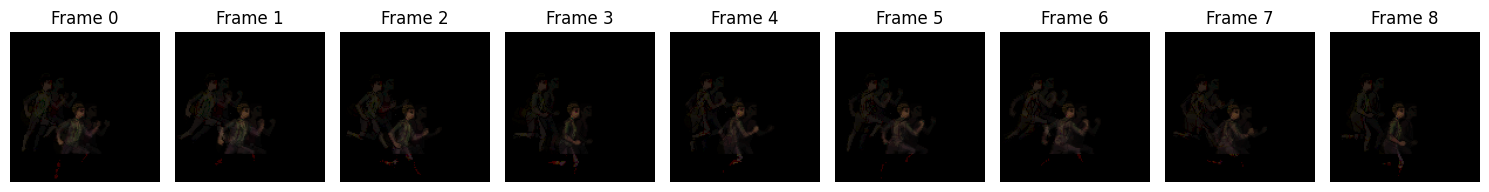

In [ ]:
import matplotlib.pyplot as plt

def display_predicted_frames(predicted_frames):
    """
    Display predicted frames using Matplotlib.

    Parameters:
    predicted_frames (numpy array): Array of predicted frames.
    """
    num_frames = predicted_frames.shape[0]

    # Create a figure to display the frames
    plt.figure(figsize=(15, 5))

    for i in range(num_frames):
        plt.subplot(1, num_frames, i + 1)  # Create a subplot for each frame
        plt.imshow(predicted_frames[i])  # Display the frame
        plt.axis('off')  # Hide the axes
        plt.title(f'Frame {i}')  # Optional: add title to each frame

    plt.tight_layout()  # Adjust subplots to fit in to the figure area.
    plt.show()  # Show the plot

# Example usage after prediction
display_predicted_frames(predicted_frames)